<a href="https://colab.research.google.com/github/MichaelDeyid/Ejercicios/blob/main/Ejercicios_serie_de_Fourier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios

1. Presente una simulación relacionada con la proyección lineal de $\mathbf{a}\in\mathbb{R}^2$ sobre $\mathbf{b}\in\mathbb{R}^2$. El código debe permitir al usuario ingresar las componentes de los dos vectores, calcular el factor de escala de la proyección y graficar los vectores de entrada y el proyectado (usar la función [pyplot.arrow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html)).

2. Encontrar la representación por serie exponencial de Fourier de la señal $x(t) = A {\rm{rect}}_{\tau/2}(t)$, con $t\in [-\tau/2,\tau/2]$. Graficar el espectro, la fase del espectro, la reconstrucción para $n\in\{0,\pm1,\pm2,\dots\}$, y determinar el valor del error relativo para cada valor de $n$. Utilice el ambiente animación de Python para mostrar los resultados.

Componente x de u: 4
Componente y de u: 8
Componente x de v: 5
Componente y de v: 2
Factor de escala (longitud de la proyección): 0.7474093186836599


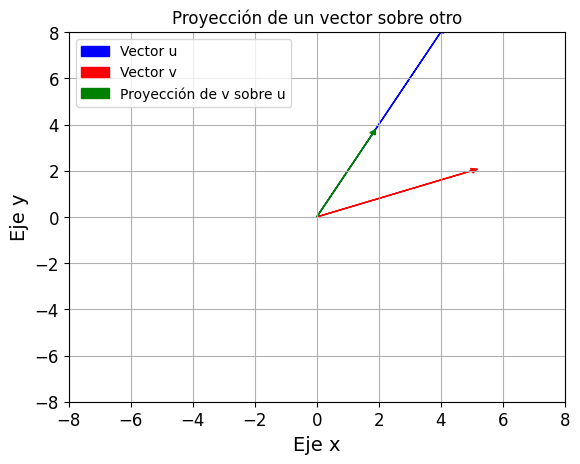

In [54]:
#Solución primer ejercicio
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular la proyección de un vector 'v' sobre otro vector 'u'
def proyeccion(u, v):
    escalar = np.dot(v, u) / np.dot(u, u)
    return escalar * u

# Pedir al usuario las componentes de los vectores
u = np.array([float(input("Componente x de u: ")), float(input("Componente y de u: "))])
v = np.array([float(input("Componente x de v: ")), float(input("Componente y de v: "))])

# Calcular la proyección de 'v' sobre 'u'
proy_v_sobre_u = proyeccion(u, v)

# Calcular el factor de escala (longitud de la proyección)
factor_escala = np.linalg.norm(proy_v_sobre_u) / np.linalg.norm(v)

# Crear una figura y ejes para la visualización
plt.figure()
ax = plt.gca()

# Dibujar el vector u
ax.arrow(0, 0, u[0], u[1], head_width=0.2, head_length=0.2, fc='blue', ec='blue', label='Vector u')

# Dibujar el vector v
ax.arrow(0, 0, v[0], v[1], head_width=0.2, head_length=0.2, fc='red', ec='red', label='Vector v')

# Dibujar la proyección de v sobre u
ax.arrow(0, 0, proy_v_sobre_u[0], proy_v_sobre_u[1], head_width=0.2, head_length=0.2, fc='green', ec='green', label='Proyección de v sobre u')

# Configurar límites de ejes
max_val = max(np.max(u), np.max(v), np.max(proy_v_sobre_u))
ax.set_xlim(-max_val, max_val)
ax.set_ylim(-max_val, max_val)

# Etiquetas y leyenda
ax.set_xlabel("Eje x")
ax.set_ylabel("Eje y")
plt.legend()

# Mostrar el factor de escala
print("Factor de escala (longitud de la proyección):", factor_escala)

# Mostrar el gráfico
plt.grid()
plt.title("Proyección de un vector sobre otro")
plt.show()

<ipython-input-13-575ec4ea1de4>:34: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


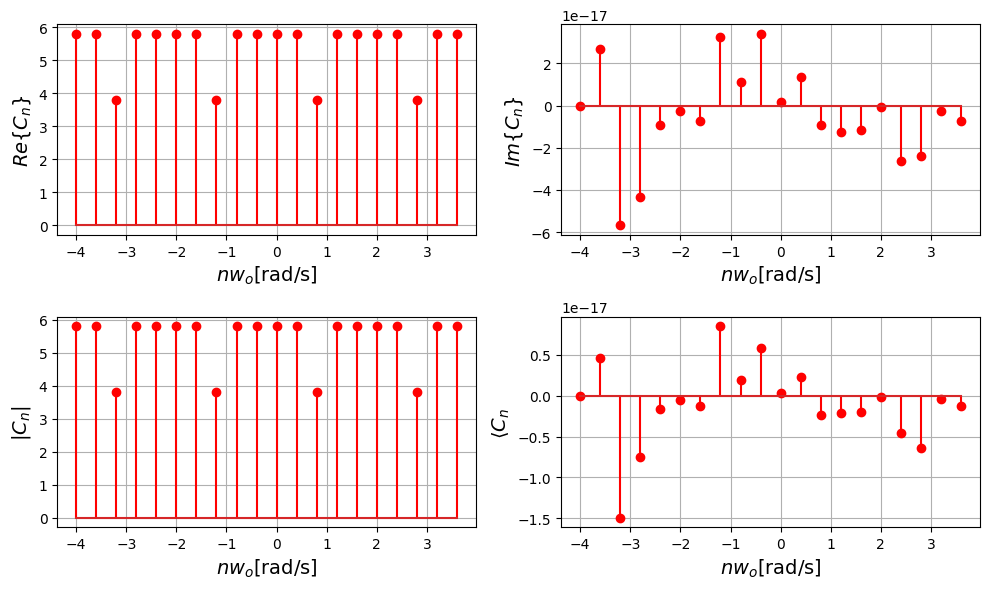

In [13]:
#Solución Segundo ejercicio
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
A = 1.0  # Amplitud
tau = 2.0  # Ancho del rectángulo
n_max = 10  # Número máximo de componentes de Fourier

# Definición de la señal
def x(t):
    return A * np.where(abs(t) <= tau / 2, 1.0, 0.0)

# Tiempo de muestreo y valores de t
num_puntos = 10
t = np.linspace(-tau/2, tau/2, num_puntos, endpoint=False)  # Evita duplicar el último punto
t_reconstruccion = np.linspace(-2 * tau, 2 * tau, num_puntos * 2, endpoint=False)

# Cálculo de la serie de Fourier utilizando Euler complejo
serie_fourier = np.zeros_like(t_reconstruccion, dtype=np.complex128)
for n in range(-n_max, n_max + 1):
    coeficiente_an = np.trapz(x(t) * np.exp(-1j * 2 * np.pi * n * t / tau), t)
    serie_fourier += coeficiente_an * np.exp(1j * 2 * np.pi * n * t_reconstruccion / tau)


# Gráfico de la señal original y la reconstruida
fig =plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, x(t), label='Señal Original')
plt.title('Señal Original y Reconstrucción usando Serie de Fourier')

#graficar espectro

plt.subplot(2,2,1)
plt.stem(t_reconstruccion, np.real(serie_fourier), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(t_reconstruccion, np.imag(serie_fourier), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(t_reconstruccion, abs(serie_fourier), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(t_reconstruccion, np.angle(serie_fourier), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()
plt.show()